# Regresión logística, LDA y QDA

## Importaciones

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

## Generación de los datos

Para este ejemplo, vamos a usar el conjunto de datos [Boston](https://www.kaggle.com/datasets/avish5787/boston-data-set]). En él, tenemos datos sobre 506 casas y la zona en las que están situadas. Para ello, vamos a intentar predecir si la casa se encuentra en una zona con alto índice de criminalidad o no.

En el caso de LDA y QDA, no existen implementaciones en `statmodels`, por lo que usaremos las que se encuentran en `sklearn`.

In [2]:
boston = pd.read_csv("./datos/Boston_modificado.csv")
print(boston)
boston = pd.get_dummies(boston)
del boston['peligroso_NO']
boston.rename(columns = {'peligroso_SI':'peligroso'}, inplace = True)

X = boston.loc[:,boston.columns != 'peligroso']
y = boston.loc[:,boston.columns == 'peligroso']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)

       zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   black   
0    18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90  \
1     0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2     0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3     0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4     0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   
..    ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...   
501   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   
502   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   
503   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   
504   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0  393.45   
505   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0  396.90   

     lstat  medv peligroso 

## Regresión logística

c:\Users\agonz\anaconda3\envs\tensorflow-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


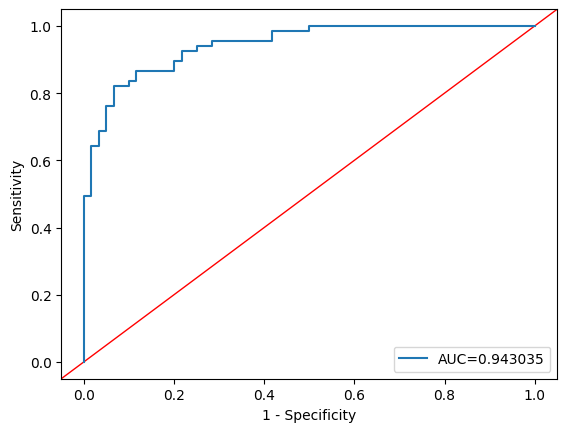

In [3]:
log_reg = LogisticRegression(max_iter = 100, C=1e9)
log_reg.fit(x_train, np.ravel(y_train))

y_pred_proba = log_reg.predict_proba(x_test)[:,1]
spe, sens, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(spe,sens,label="AUC="+str(round(auc,6)))
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.legend(loc=4)
plt.show()

Optimization terminated successfully.
         Current function value: 0.195179
         Iterations 11


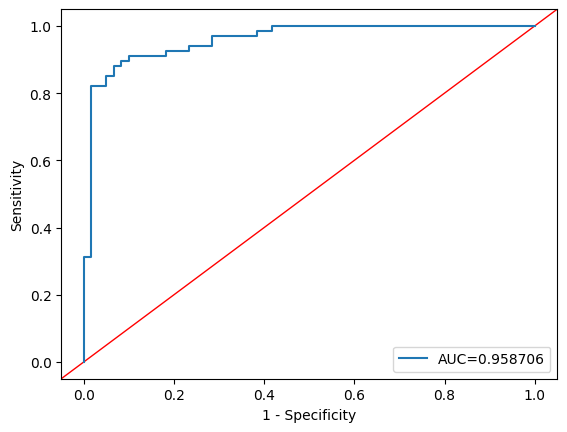

In [4]:
X_train = pd.concat([x_train, y_train.astype(float)], axis=1)
X_test = pd.concat([x_test, y_test.astype(float)], axis=1)

log_reg = smf.logit(formula = "peligroso  ~ " + " + ".join(x_train.columns), data=X_train).fit()

y_pred_proba = log_reg.predict(X_test)
spe, sens, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(spe,sens,label="AUC="+str(round(auc,6)))
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.legend(loc=4)
plt.show()

In [5]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              peligroso   No. Observations:                  379
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                           13
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:                  0.7183
Time:                        15:58:04   Log-Likelihood:                -73.973
converged:                       True   LL-Null:                       -262.64
Covariance Type:            nonrobust   LLR p-value:                 1.360e-72
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.6124      8.536     -2.766      0.006     -40.342      -6.883
zn            -0.0545      0.036     -1.519      0.129      -0.125       0.016
indus         -0.1105      0.054     -2.038      0.042      -0.217      -0.004
chas           1.7146      0.817      2.098      0.036       0.112       3.317
nox           51.1584      8.834      5.791      0.000      33.844      68.473
rm            -0.4164      0.804     -0.518      0.604      -1.992       1.159
age            0.0317      0.015      2.172      0.030       0.003       0.060
dis            0.7253      0.257      2.819      0.005       0.221       1.230
rad            0.6089      0.177      3.433      0.001       0.261       0.957
tax           -0.0059      0.003     -1.833      0.067      -0.012       0.000
ptratio        0.5730      0.165      3.471      0.001       0.249       0.897
black         -0.0535      0.018     -2.945      0.003      -0.089      -0.018
lstat          0.0031      0.059      0.052      0.958      -0.113       0.119
medv           0.1563      0.076      2.050      0.040       0.007       0.306
==============================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## LDA

Cuando hacemos las predicciones `predict_proba`, obtenemos un array de `n_muestras x n_grupos`. Como con la curva ROC solo podemos tener dos grupos, debemos seleccionar una de las dos columnas de probabilidad, por ello `lda.predict_proba(x_test)[:,1]`.

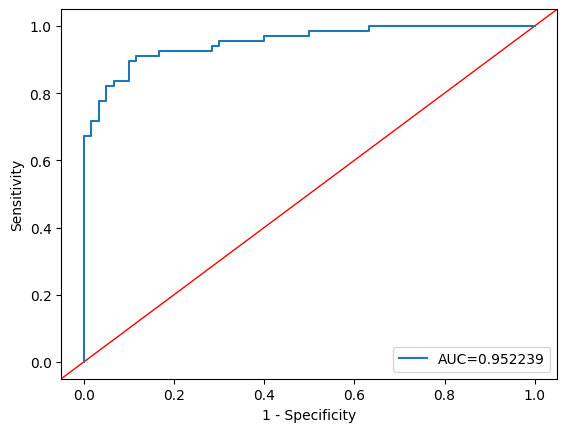

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, np.ravel(y_train))

y_pred_proba = lda.predict_proba(x_test)[:,1]
spe, sens, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(spe,sens,label="AUC="+str(round(auc,6)))
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.legend(loc=4)
plt.show()

## QDA

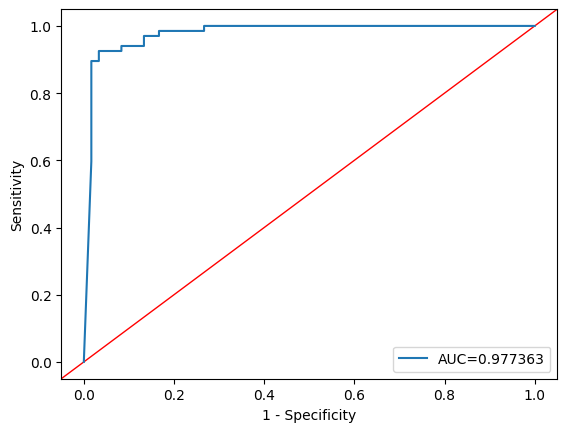

In [7]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, np.ravel(y_train))

y_pred_proba = qda.predict_proba(x_test)[:,1]
spe, sens, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(spe,sens,label="AUC="+str(round(auc,6)))
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.legend(loc=4)
plt.show()

## Comparación de los modelos

Tanto el LDA como el QDA son algoritmos diferentes a la regresión logística, no es posible obtener los estadísticos de significancia de variable por lo que antes deberemos hacer un análisis exploratorio para descartar las variables que no sirven en nuestro modelo.

Con la regresión logística obtuvimos un área en test de 0.9587, con LDA de 0.9522 y con QDA de 0.9773. Por lo tanto, podemos concluir que QDA es el que mejor clasifica lo que implica que la frontera de clasificación no es completamente lineal.